Problems from *Reinforcement Learning*, by Sutton and Barto, 2nd edition.

In [22]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Exercise 2.5 (programming) Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter,$\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say of 10,000 steps.

In [3]:
qs = [stats.norm(0, 1) for _ in range (10)]

def update_qs(qs):
    for i in range(len(qs)):
        qs[i] = stats.norm(qs[i].mean + stats.norm(0, 0.01).rvs(), 1)

epsilon = 0.1
payout = []
for t = range(1000):
    if np.random.random() < epsilon:
        choice = 


SyntaxError: invalid syntax (<ipython-input-3-e49c45a9e5f7>, line 9)

In [11]:
os = [0]
alpha = 0.01

for _ in range(100):
    os.append(os[-1] + alpha*(1 - os[-1]))

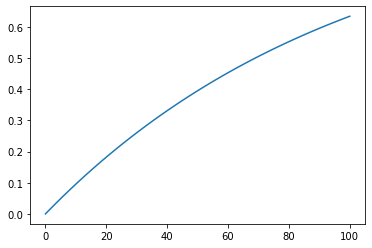

In [12]:
fig, ax = plt.subplots()
ax.plot(os)

Discounting (from quiz)

In [14]:
r = [-3, 5, 2, 7, 1]


In [15]:
def discount(r, ldb):
    r = r.copy()
    g = [0]
    while r:
        g.insert(0, r.pop() + ldb * g[0])
        print(g)
    return g

In [16]:
discount(r, 0.8)

[1.0, 0]
[7.8, 1.0, 0]
[8.24, 7.8, 1.0, 0]
[11.592, 8.24, 7.8, 1.0, 0]
[6.2736, 11.592, 8.24, 7.8, 1.0, 0]


[6.2736, 11.592, 8.24, 7.8, 1.0, 0]

In [9]:
list.insert?

In [20]:
2 + .8 * 7.8

8.24

Exercise 4.9 (programming) Implement value iteration for the gambler’s problem and solve it for $p_h = 0.25$ and $p_h = 0.55$. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \to 0$?

In [121]:
def gamblers_values(ph=0.5, n_dollars=100, n_iterations=1000):
    v = np.zeros(n_dollars+1)
    v[n_dollars] = 1
    for _ in range(n_iterations):
        ses = np.random.choice(np.arange(1, n_dollars,
                                         dtype=int),
                               n_dollars-1,
                               replace=False)
        ses = np.arange(1, n_dollars, dtype=int)
        for s in ses:
            actions = np.arange(1, min(n_dollars+1-s, s+1),
                                dtype=int)
            v[s] = np.max(v[s + actions] * ph +
                          v[s - actions] * (1-ph))
    return v


In [122]:
def gamblers_policy(v):
    n_dollars = len(v) - 1
    pi = np.zeros(n_dollars + 1)
    for s in np.arange(1, n_dollars, dtype=int):
        actions = np.arange(1, min(n_dollars+1-s, s+1),
                            dtype=int)
        pi[s] = np.argmax(v[s + actions] * ph +
                          v[s - actions] * (1-ph)) + 1
    return pi

<BarContainer object of 101 artists>

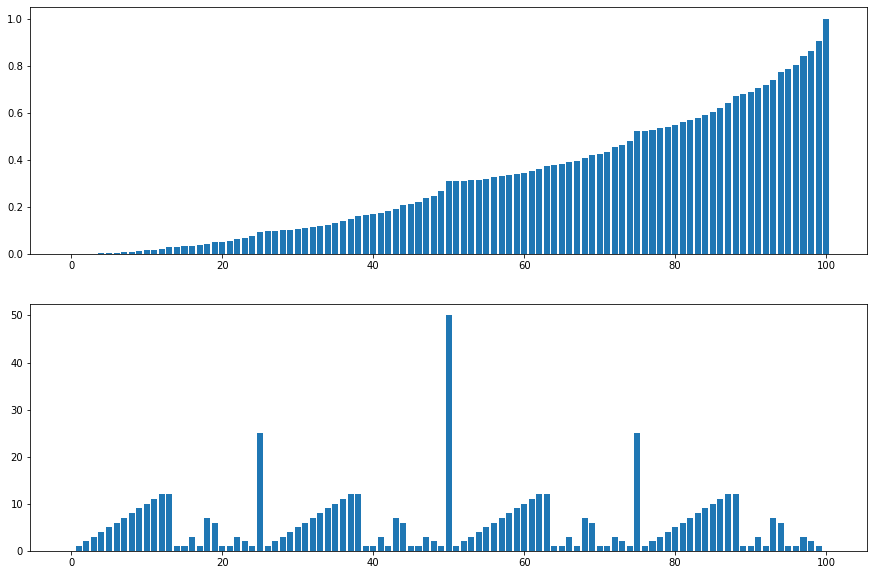

In [123]:
v = gamblers_values(0.31)
pi = gamblers_policy(v)
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].bar(np.arange(0, 101), v)
axs[1].bar(np.arange(0, 101), pi)